In [6]:
import numpy as np
import cv2
import os
import tensorflow as tf


In [13]:
train = 'walk_or_run_train/train'
test = 'walk_or_run_test/test'
categories = ['walk','run']
img_size=50

In [16]:
training_data=[]
test_data=[]

In [17]:
def create_training_data():
    for category in categories:
        path=os.path.join(train, category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [18]:
len(training_data)

600

In [19]:
def create_test_data():
    for category in categories:
        path=os.path.join(DATADIR_TEST, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array, (img_size,img_size))
                test_data.append([new_array,class_num])
            except Exception as e:
                pass

create_test_data()

In [20]:
len(test_data)

141

In [60]:
import random
random.shuffle(training_data)
random.shuffle(test_data)

In [82]:
X_train = []
y_train = []

In [83]:
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

In [84]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [85]:
X_train[0]

array([[38, 45, 51, ..., 53, 46, 39],
       [41, 47, 61, ..., 60, 49, 41],
       [42, 38, 40, ..., 63, 53, 43],
       ...,
       [21, 30, 57, ..., 28, 23, 21],
       [38, 49, 49, ..., 27, 21, 18],
       [31, 28, 17, ..., 24, 21, 18]], dtype=uint8)

In [86]:
X_test = []
y_test = []

In [87]:
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

In [88]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [89]:
print(len(X_test))

141


Instead of Normalizing the data another alternative is to use Convolutional neural network and maxpooling <br>
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))#3x3 filter<br>
model.add(Activation('relu'))<br>
model.add(MaxPooling2D(pool_size=(2, 2)))<br>

In [90]:
X_train=tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(X_test, axis=1)

In [91]:
import matplotlib.pyplot as plt

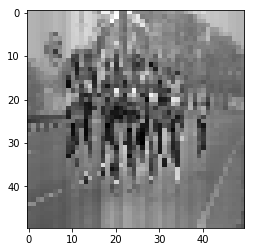

In [92]:
new_array = X_train[5].reshape(img_size,img_size)
plt.imshow(new_array,cmap = "gray")

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Flatten

### kernel_initializer is used to create the initail weights and this can be<br>
keras.initializers.Zeros()#creates zeros <br>
keras.initializers.Ones()#creates ones<br>
keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)#random numbers between -0.05 to 0.05 <br>
keras.initializers.glorot_normal(seed=None)#uses Glorot normal initializer<br>

https://keras.io/initializers/

In [180]:
model = keras.Sequential([
    #first layer
    keras.layers.Flatten(input_shape=(50, 50)),#shape of image,
    keras.layers.Dense(256, kernel_initializer='random_uniform',bias_initializer='zeros',activation=tf.nn.relu),
    #keras.layers.Dense(128,kernel_initializer=keras.initializers.Ones(),bias_initializer='zeros'),
    #second layer
    keras.layers.Dense(64, activation=tf.nn.relu),
    #third layer
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [183]:
# Define loss and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [186]:
#train your model
model.fit(X_train, y_train, batch_size=100, epochs=30, validation_split=0.1)

Train on 540 samples, validate on 60 samples
Epoch 1/30
540/540 [==============================] - 0s 347us/step - loss: 0.2511 - acc: 0.9204 - val_loss: 1.0762 - val_acc: 0.4833
Epoch 2/30
540/540 [==============================] - 0s 366us/step - loss: 0.2458 - acc: 0.9389 - val_loss: 0.9921 - val_acc: 0.5833
Epoch 3/30
540/540 [==============================] - 0s 385us/step - loss: 0.2340 - acc: 0.9296 - val_loss: 1.0901 - val_acc: 0.5167
Epoch 4/30
540/540 [==============================] - 0s 393us/step - loss: 0.2349 - acc: 0.9241 - val_loss: 1.1194 - val_acc: 0.4833
Epoch 5/30
540/540 [==============================] - 0s 333us/step - loss: 0.2576 - acc: 0.9000 - val_loss: 0.9761 - val_acc: 0.6167
Epoch 6/30
540/540 [==============================] - 0s 329us/step - loss: 0.2312 - acc: 0.9167 - val_loss: 0.9925 - val_acc: 0.5833
Epoch 7/30
540/540 [==============================] - 0s 357us/step - loss: 0.2322 - acc: 0.9185 - val_loss: 1.2635 - val_acc: 0.4333
Epoch 8/30
540/54

In [187]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:', test_acc)

141/141 [==============================] - 0s 700us/step
Test accuracy: 0.5673758871589146


In [191]:
Y_pred = model.predict_classes(x_test)


In [196]:
!pip install seaborn

In [204]:
matrix=confusion_matrix(y_test, Y_pred)


In [206]:
matrix

array([[40, 19],
       [42, 40]], dtype=int64)

In [205]:
matrix.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'